# HOUSING PRICE PREDICTION

# Problem Statement :

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know.

Which variables are significant in predicting the price of a house, and How well those variables describe the price of a house. 

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

# DATA

Data has 1460 entries and it has 81 variables. 

There two datasets: train.csv (1168 records)

test.csv(292 records)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
print(df_train)

       Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeat

In [4]:
print(df_test)

       Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fenc

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# Observations:
    
As per the Train Data having 1168 data sets with 81 columns and that data contains integer,float acategorical data.

In [6]:
# Find columns with missing values and their percent missing
df_train.isnull().sum()                                                     
miss_val = df_train.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df_train.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df_train.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
PoolQC,1161,99.40
MiscFeature,1124,96.23
Alley,1091,93.41
Fence,931,79.71
FireplaceQu,551,47.17
LotFrontage,214,18.32
GarageType,64,5.48
GarageCond,64,5.48
GarageYrBlt,64,5.48
GarageFinish,64,5.48


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# Observations:
    
Test data contains only 292 data sets and holding with some null values.

In [8]:
# Find columns with missing values and their percent missing
df_test.isnull().sum()                                                     
miss_val = df_test.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df_test.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df_test.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
PoolQC,292,100.00
MiscFeature,282,96.58
Alley,278,95.21
Fence,248,84.93
FireplaceQu,139,47.60
LotFrontage,45,15.41
GarageCond,17,5.82
GarageType,17,5.82
GarageYrBlt,17,5.82
GarageFinish,17,5.82


# Observations:

By comparing both train and test data column PoolQC,MiscFeature,Alley,Fence,FireplaceQu having more than 45% data is missing.

So removing from data set, remaining all very small percent and fill the null values.

In [9]:
df_train= df_train.drop(['Fence', 'MiscFeature', 'PoolQC','FireplaceQu','Alley'], axis=1)
df_test= df_test.drop(['Fence', 'MiscFeature', 'PoolQC','FireplaceQu','Alley'], axis=1)

In [10]:
print(df_train.shape)
print(df_test.shape)

(1168, 76)
(292, 75)


In [11]:
for i, column_data in enumerate(df_train.dtypes.items()):
    column , dtype = column_data
    if dtype=='object':
        df_train[column].fillna(method='backfill',inplace=True)
    else:
        df_train[column].fillna(df_train[column].mean(), inplace=True)

In [12]:
df_train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [13]:
for i, column_data in enumerate(df_test.dtypes.items()):
    column , dtype = column_data
    if dtype=='object':
        df_test[column].fillna(method='backfill',inplace=True)
    else:
        df_test[column].fillna(df_test[column].mean(), inplace=True)

In [14]:
df_test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [15]:
print(df_train.shape)
print(df_test.shape)

(1168, 76)
(292, 75)


# Observation:

Now we can see tat there is no missing values in the dataset.

In [16]:
for column_data in df_train.dtypes.items():
    column, dtype = column_data
    if dtype == 'object':
        print(column)
        print(df_train[column].value_counts())
        print('-'*30)
    else:
        print(column)
        print(df_train[column].value_counts())
        print('-'*30)

Id
1460    1
501     1
476     1
477     1
478     1
       ..
959     1
961     1
962     1
963     1
1       1
Name: Id, Length: 1168, dtype: int64
------------------------------
MSSubClass
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
------------------------------
MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
------------------------------
LotFrontage
70.98847     214
60.00000     111
80.00000      60
70.00000      58
75.00000      46
            ... 
160.00000      1
124.00000      1
39.00000       1
106.00000      1
149.00000      1
Name: LotFrontage, Length: 107, dtype: int64
------------------------------
LotArea
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length:

------------------------------
GarageCars
2    665
1    288
3    147
0     64
4      4
Name: GarageCars, dtype: int64
------------------------------
GarageArea
0       64
440     44
576     39
240     31
528     26
        ..
566      1
562      1
558      1
554      1
1418     1
Name: GarageArea, Length: 392, dtype: int64
------------------------------
GarageQual
TA    1112
Fa      40
Gd      12
Ex       2
Po       2
Name: GarageQual, dtype: int64
------------------------------
GarageCond
TA    1124
Fa      28
Gd       9
Po       6
Ex       1
Name: GarageCond, dtype: int64
------------------------------
PavedDrive
Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64
------------------------------
WoodDeckSF
0      603
144     29
192     28
100     26
120     25
      ... 
185      1
342      1
183      1
344      1
857      1
Name: WoodDeckSF, Length: 244, dtype: int64
------------------------------
OpenPorchSF
0      531
36      24
48      18
20      17
24      14
      ... 


In [17]:
df_train['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Observatios:
    
As it shows that the 75% of Max having difference and our column is rightly skewed.

skewing for plotting with variables.

Skew is: 1.953877705368286


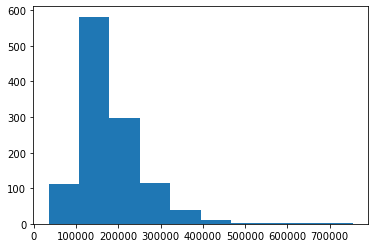

Skew is: 0.07360997199445295


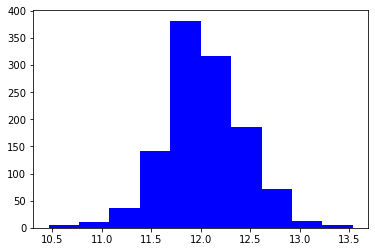

In [18]:
# Determining the Skewness of data 
print ("Skew is:", df_train.SalePrice.skew())

plt.hist(df_train.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
df_train['Skewed_SP'] = np.log(df_train['SalePrice']+1)
print ("Skew is:", df_train['Skewed_SP'].skew())
plt.hist(df_train['Skewed_SP'], color='blue')
plt.show()

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

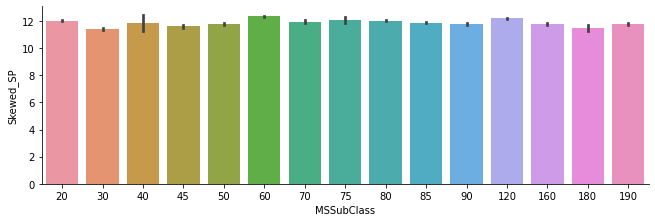

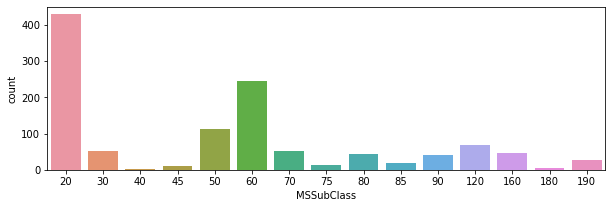

In [19]:
sns.factorplot('MSSubClass', 'Skewed_SP', data=df_train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=df_train)
df_train['MSSubClass'].value_counts()

# Observations:

MSSubClass = 60 has highest SalePrice, while the sales of houses with MSSubClass = 20 is the highest.

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

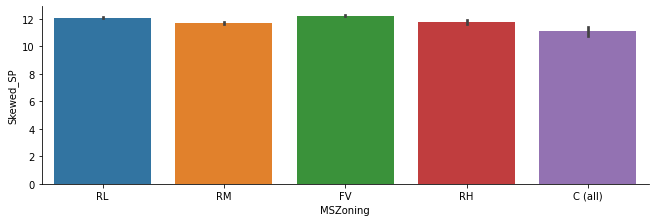

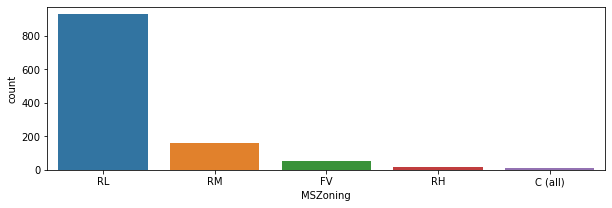

In [20]:
sns.factorplot('MSZoning', 'Skewed_SP', data=df_train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=df_train, ax=axis1)
df_train['MSZoning'].value_counts()

# Observations:
    
For MsZoning RL is the Highest when comparing with Skewed Sales Price FV is Highest.

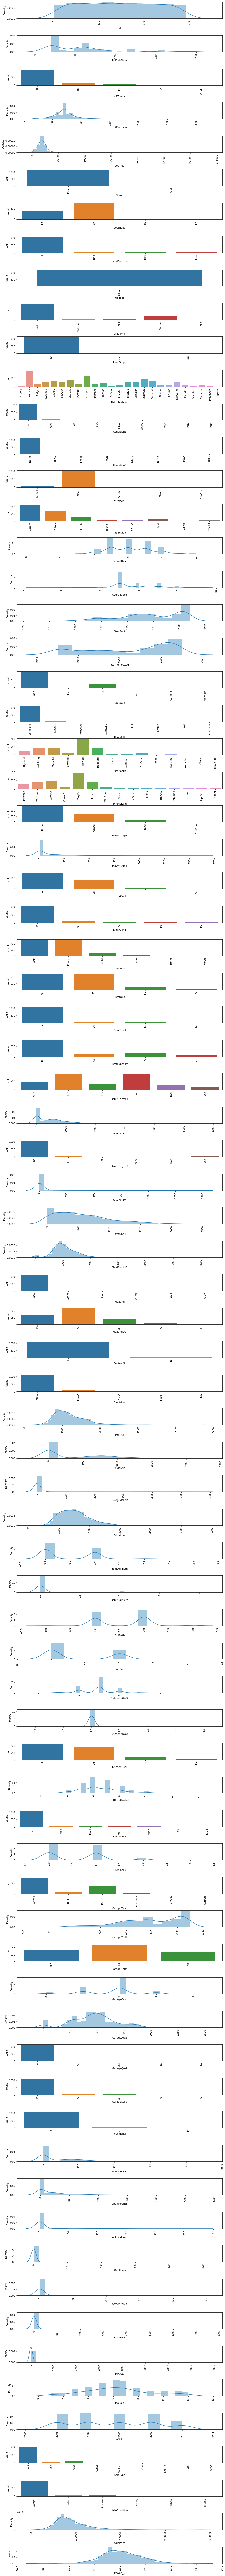

In [21]:
plt.figure(figsize=[15,200])
for i, column_data in enumerate(df_train.dtypes.items()):
    column,dtype = column_data
    plt.subplot(80,1,i+1)
    plt.subplots_adjust(hspace=1)
    
    if dtype == 'object':
        plt.xticks(rotation=90)
        sns.countplot(df_train[column])
    else:
        plt.xticks(rotation=90)
        sns.distplot(df_train[column],kde=True)

# Observations:
    
1.The Data mostly all numeric varaibles are skewed.

2.Sales Condition is Normal and sale type is Warranty DEED-Conventional.

3.Mostly are Paved Drive, Garage Conditions and Garage Quality are Typically/Average.

4.Mostly GarageFinish are unfinished and GarageType is Attached.

5.Mostly Home Functionality is Typical.

6.KitchenQuality is Typically Average.

7.Electrical is Standard Circuit Breakers & Romex.

8.Central Air is Yes.

9.Heating Quality COndition is Excellent.

10.Heating is Gas forced warm air furnished.

11.Basement Finish Type1 is Unfurnished.

12.Basement Finish Type2 is Unfurnished.

13.No Exposure to walkout or garden level walls.

14.VInylSD are mostly used material for rooms.

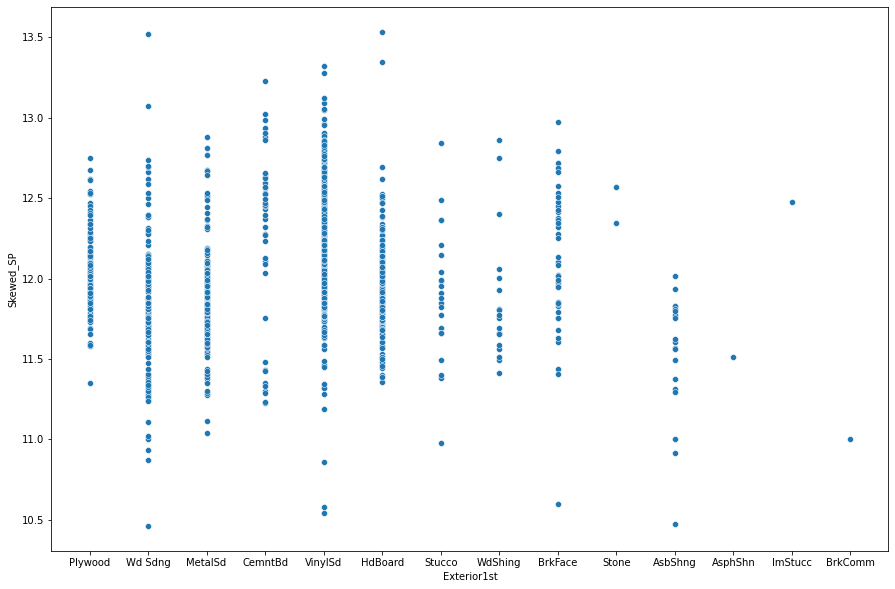

In [22]:
plt.figure(figsize=[15,10])
sns.scatterplot(x='Exterior1st',y='Skewed_SP',data=df_train)
plt.show()

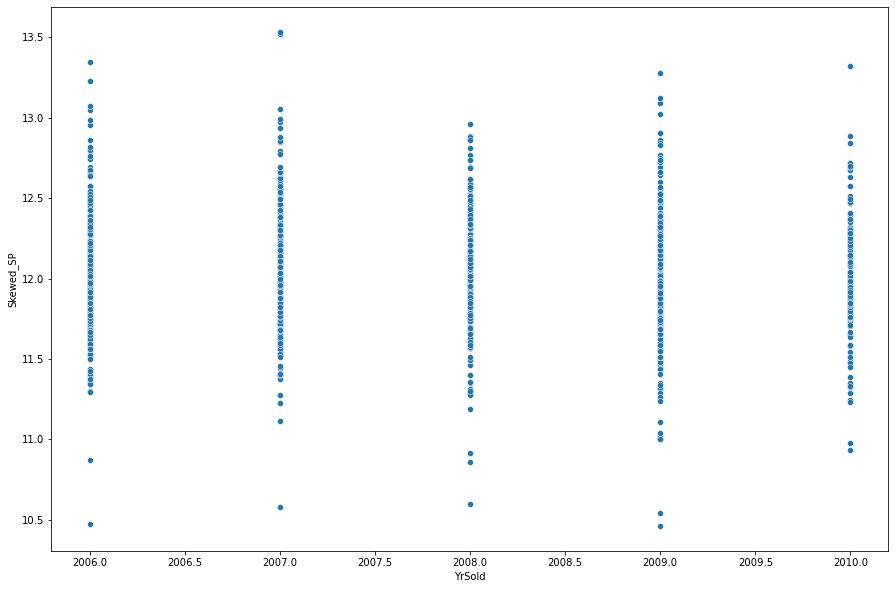

In [23]:
plt.figure(figsize=[15,10])
sns.scatterplot(x='YrSold',y='Skewed_SP',data=df_train)
plt.show()

In [24]:
df_train.OverallQual.unique()

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10], dtype=int64)

In [25]:
#Creating a pivot table 
quality_pivot = df_train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)

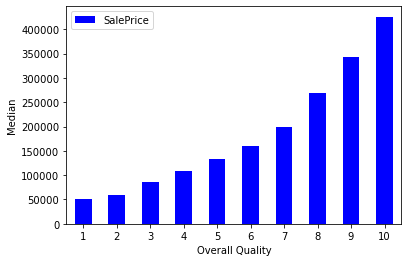

In [26]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

# Observations:

    
If Quality Increases than Sales Price also increases.

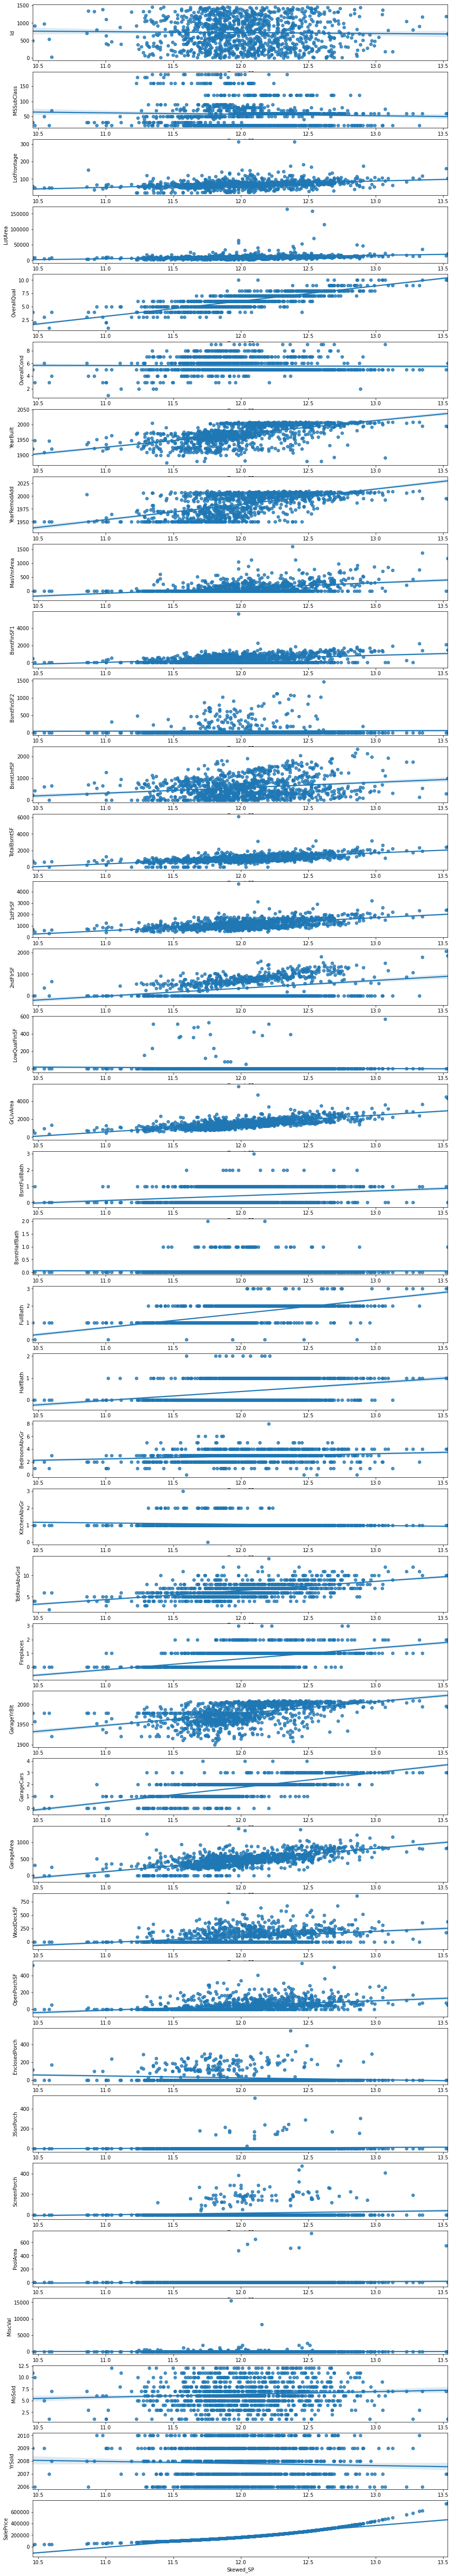

In [27]:
plt.figure(figsize=[15,200])
j = 0 
for column, dtype in df_train.drop('Skewed_SP',axis=1).dtypes.items():
    if dtype != 'object':
        plt.subplot(80,1,j+1)    
        sns.regplot(df_train['Skewed_SP'],df_train[column],)
        j += 1

# Observations:
    
As per the Analysis of the data there are so many outliers and most of the data is directly proportional.

In [28]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
for i in df_train.columns:
    df_train[i]=le.fit_transform(df_train[i])
    df_train

In [30]:
for i in df_test.columns:
    df_test[i]=le.fit_transform(df_test[i])
    df_test

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1168 non-null   int64
 1   MSSubClass     1168 non-null   int64
 2   MSZoning       1168 non-null   int32
 3   LotFrontage    1168 non-null   int64
 4   LotArea        1168 non-null   int64
 5   Street         1168 non-null   int32
 6   LotShape       1168 non-null   int32
 7   LandContour    1168 non-null   int32
 8   Utilities      1168 non-null   int32
 9   LotConfig      1168 non-null   int32
 10  LandSlope      1168 non-null   int32
 11  Neighborhood   1168 non-null   int32
 12  Condition1     1168 non-null   int32
 13  Condition2     1168 non-null   int32
 14  BldgType       1168 non-null   int32
 15  HouseStyle     1168 non-null   int32
 16  OverallQual    1168 non-null   int64
 17  OverallCond    1168 non-null   int64
 18  YearBuilt      1168 non-null   int64
 19  YearRe

In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             292 non-null    int64
 1   MSSubClass     292 non-null    int64
 2   MSZoning       292 non-null    int32
 3   LotFrontage    292 non-null    int64
 4   LotArea        292 non-null    int64
 5   Street         292 non-null    int32
 6   LotShape       292 non-null    int32
 7   LandContour    292 non-null    int32
 8   Utilities      292 non-null    int32
 9   LotConfig      292 non-null    int32
 10  LandSlope      292 non-null    int32
 11  Neighborhood   292 non-null    int32
 12  Condition1     292 non-null    int32
 13  Condition2     292 non-null    int32
 14  BldgType       292 non-null    int32
 15  HouseStyle     292 non-null    int32
 16  OverallQual    292 non-null    int64
 17  OverallCond    292 non-null    int64
 18  YearBuilt      292 non-null    int64
 19  YearRemo

In [33]:
df_train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Skewed_SP
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,583.500000,4.166096,3.013699,40.920377,414.643836,0.996575,1.938356,2.773973,0.0,3.004281,...,0.166952,2.630993,0.023973,0.299658,5.344178,1.804795,7.465753,3.768836,261.805651,261.805651
std,337.316864,4.139986,0.633120,18.812920,249.993254,0.058445,1.412262,0.710027,0.0,1.642667,...,1.351138,10.103236,0.345529,1.834432,2.686352,1.329738,1.619459,1.112208,149.862407,149.862407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,291.750000,0.000000,3.000000,30.000000,197.750000,1.000000,0.000000,3.000000,0.0,2.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,8.000000,4.000000,137.750000,137.750000
50%,583.500000,4.000000,3.000000,41.000000,407.500000,1.000000,3.000000,3.000000,0.0,4.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,8.000000,4.000000,245.500000,245.500000
75%,875.250000,6.000000,3.000000,50.250000,618.250000,1.000000,3.000000,3.000000,0.0,4.000000,...,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,8.000000,4.000000,379.000000,379.000000
max,1167.000000,14.000000,4.000000,106.000000,891.000000,1.000000,3.000000,3.000000,0.0,4.000000,...,17.000000,64.000000,7.000000,19.000000,11.000000,4.000000,8.000000,5.000000,580.000000,580.000000


In [34]:
df_train=df_train.drop(['SalePrice', 'Id','Utilities','GarageArea','WoodDeckSF','LowQualFinSF','YearBuilt','YearRemodAdd','GrLivArea','GarageYrBlt','EnclosedPorch','3SsnPorch','PoolArea','MiscVal','LandSlope','LandContour','GarageQual','GarageCond','PavedDrive','ScreenPorch','MSZoning','Street','Condition1','Condition2','BldgType','RoofStyle','RoofMatl','ExterCond','BsmtFinType2','BsmtFinSF2','Heating','CentralAir','Electrical','BsmtHalfBath','KitchenAbvGr','Functional','SaleType','SaleCondition'], axis=1)

In [35]:
df_test=df_test.drop(['Id','Utilities','GarageArea','WoodDeckSF','LowQualFinSF','YearBuilt','YearRemodAdd','GrLivArea','GarageYrBlt','EnclosedPorch','3SsnPorch','PoolArea','MiscVal','LandSlope','LandContour','GarageQual','GarageCond','PavedDrive','ScreenPorch','MSZoning','Street','Condition1','Condition2','BldgType','RoofStyle','RoofMatl','ExterCond','BsmtFinType2','BsmtFinSF2','Heating','CentralAir','Electrical','BsmtHalfBath','KitchenAbvGr','Functional','SaleType','SaleCondition'], axis=1)

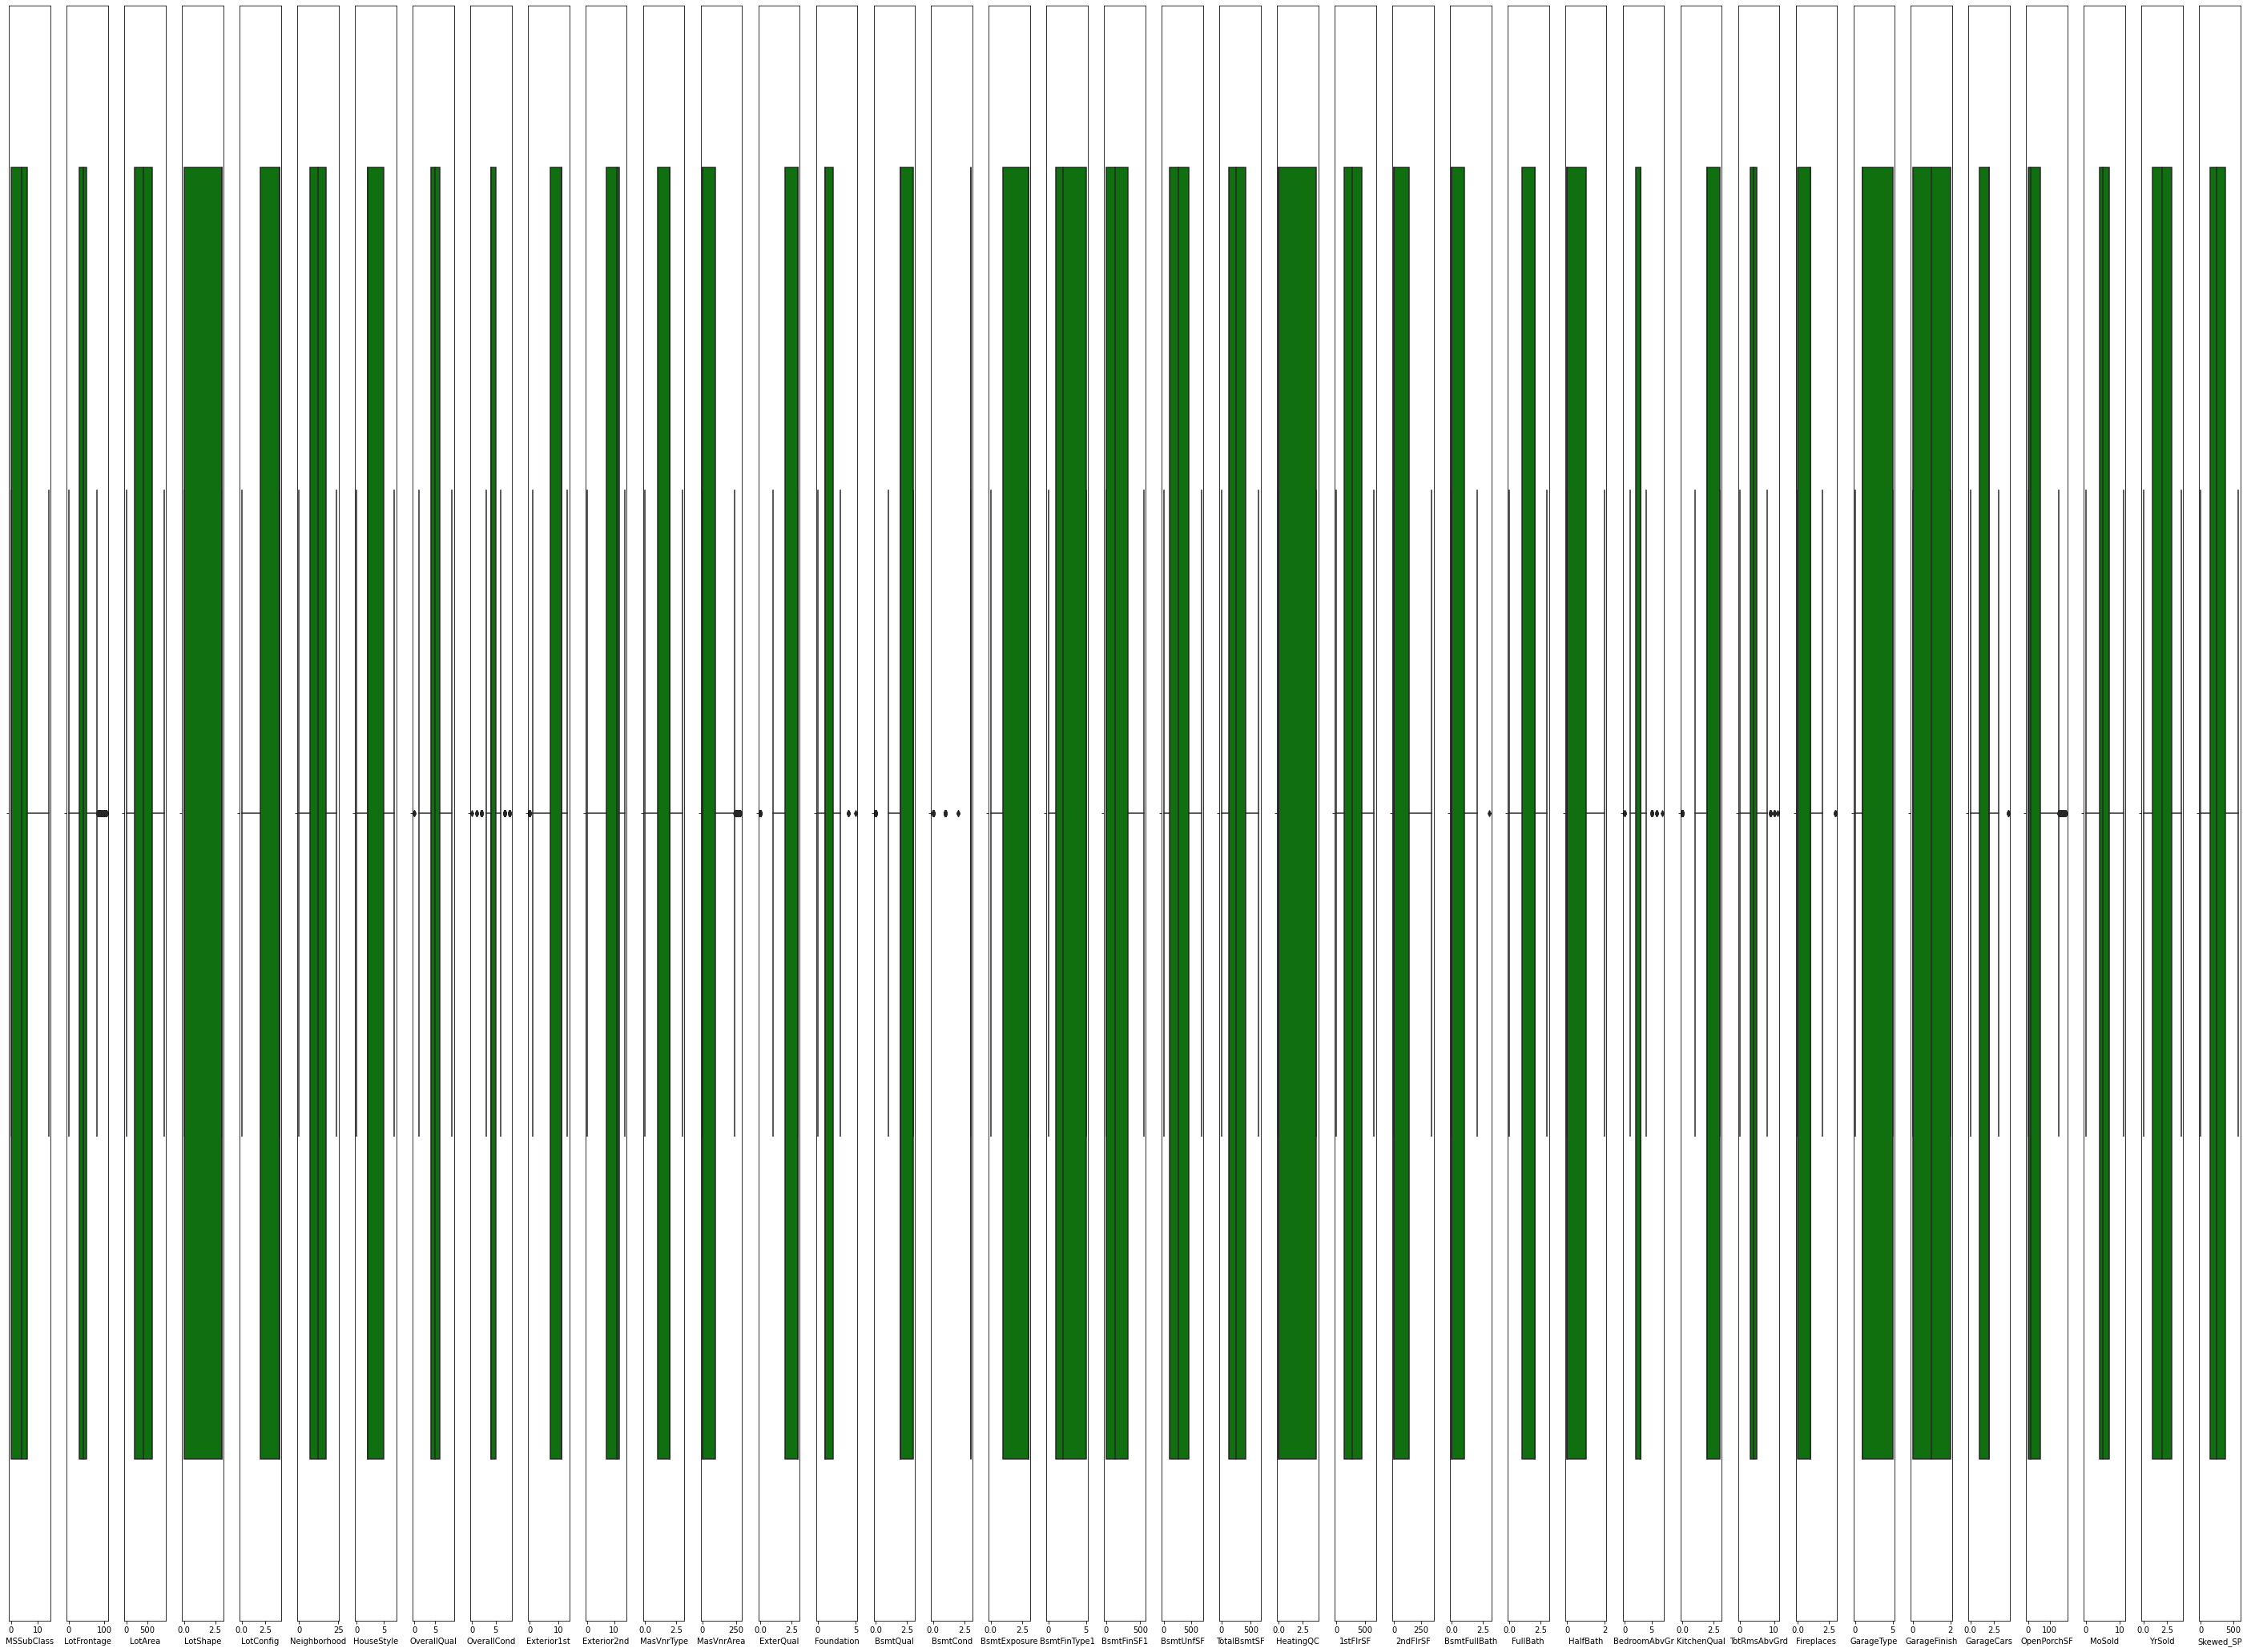

In [36]:
collist=df_train.columns.values
ncol=80
nrows=14
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_train[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [37]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_train))
z

array([[1.65141417, 0.00423419, 1.33918487, ..., 1.61782184, 0.60548713,
        0.88656349],
       [1.00673783, 1.3336774 , 1.57414112, ..., 1.3614701 , 0.60548713,
        1.37648045],
       [0.20151308, 1.17414422, 0.13748723, ..., 0.12817587, 0.60548713,
        1.38983174],
       ...,
       [1.89306435, 2.12287496, 1.59930326, ..., 0.24423562, 0.8992128 ,
        0.41259264],
       [0.44316326, 1.11249812, 0.53882058, ..., 0.24423562, 0.14686284,
        1.72101922],
       [0.20151308, 0.00423419, 0.78293169, ..., 0.12817587, 1.3578371 ,
        0.29502582]])

In [38]:
threshold=3
print(np.where(z>3))

(array([  15,   23,   27,   28,   30,   32,   32,   48,   51,   52,   78,
         93,  103,  103,  104,  106,  119,  119,  141,  145,  153,  159,
        160,  163,  177,  180,  183,  191,  192,  193,  195,  195,  205,
        210,  211,  211,  232,  241,  259,  262,  279,  299,  303,  335,
        350,  352,  361,  361,  369,  378,  378,  380,  383,  389,  394,
        395,  395,  401,  401,  403,  418,  423,  423,  441,  444,  449,
        460,  462,  477,  483,  483,  483,  488,  495,  498,  504,  510,
        515,  517,  517,  521,  524,  544,  572,  574,  581,  582,  583,
        592,  592,  592,  592,  592,  592,  602,  614,  614,  614,  615,
        622,  626,  626,  626,  636,  642,  644,  644,  653,  664,  683,
        685,  691,  695,  701,  711,  713,  713,  713,  721,  722,  723,
        746,  752,  754,  757,  758,  762,  769,  769,  770,  772,  775,
        783,  791,  797,  798,  800,  804,  804,  815,  846,  846,  852,
        858,  859,  862,  863,  871,  882,  888,  

In [39]:
df_new=df_train[(z<3) .all(axis=1)]
df_new

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,...,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,OpenPorchSF,MoSold,YrSold,Skewed_SP
0,11,41,80,0,4,13,2,5,4,8,...,3,3,1,1,1,2,144,1,1,129
1,0,66,808,0,4,12,2,7,5,12,...,2,6,1,1,2,2,145,9,1,468
2,5,63,449,0,1,15,5,6,4,7,...,3,6,1,1,2,2,101,5,1,470
3,0,76,632,0,4,14,2,5,5,8,...,3,5,1,1,1,2,95,0,4,326
4,0,41,821,0,2,14,2,5,6,4,...,2,6,1,1,0,2,0,5,3,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0,41,438,0,4,19,2,4,4,7,...,3,3,0,5,2,1,0,1,4,114
1164,0,37,313,3,4,7,2,3,4,11,...,2,3,0,5,0,2,77,4,3,76
1165,12,1,15,3,2,13,5,5,5,8,...,3,5,1,1,2,2,0,6,3,200
1166,6,20,280,3,4,9,5,3,3,3,...,3,4,0,5,2,1,41,6,2,4


In [40]:
z=np.abs(zscore(df_test))
print(z)
threshold=3
print(np.where(z>3))
df_new1=df_test[(z<3) .all(axis=1)]
df_new1

[[0.98098375 1.18130104 1.37202826 ... 0.20825783 0.27695974 0.65090813]
 [1.60810402 0.03172677 1.15954685 ... 0.81537354 0.63799655 0.86355541]
 [0.98098375 0.03172677 0.88249716 ... 1.9143101  0.08407707 0.86355541]
 ...
 [0.98098375 0.03172677 0.67269812 ... 0.81537354 1.16718749 1.62078718]
 [0.03949729 0.98260347 1.29941288 ... 0.5878999  1.36007017 1.4081399 ]
 [1.84347563 2.06455572 1.57914494 ... 0.81537354 0.08407707 1.4081399 ]]
(array([ 20,  29,  45,  49,  52,  55,  55,  73,  82,  85, 105, 105, 122,
       123, 141, 141, 143, 154, 157, 179, 184, 186, 199, 199, 199, 199,
       210, 215, 228, 242, 257, 267, 272, 273, 277, 279, 281, 282, 291],
      dtype=int64), array([ 8, 16, 16, 13,  9,  8, 28, 30, 28, 30, 25, 28, 14, 27, 13, 30, 13,
        8, 30, 14, 13,  8, 27, 28, 30, 34,  8, 16, 13,  8, 13, 16, 13, 25,
       14, 13, 13, 16, 16], dtype=int64))


,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,...,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,OpenPorchSF,MoSold,YrSold
0,0,48,215,0,0,21,2,6,2,9,...,3,2,5,1,1,0,3,27,6,1
1,11,31,34,0,1,21,2,5,2,5,...,1,2,1,1,1,1,2,0,7,3
2,0,31,180,3,4,4,2,5,2,9,...,3,0,4,1,1,1,2,72,5,3
3,6,40,185,3,4,5,5,4,4,6,...,3,1,4,1,1,2,1,0,6,3
4,5,48,220,0,1,20,5,3,2,9,...,4,2,6,1,3,0,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0,56,137,0,4,11,2,3,2,5,...,3,3,4,1,1,1,2,0,6,2
287,0,43,139,3,4,20,2,5,2,9,...,3,2,3,1,1,1,3,55,9,2
288,0,21,115,1,4,4,2,2,2,9,...,3,3,2,0,5,2,2,0,1,2
289,0,31,165,0,1,11,2,3,4,10,...,2,3,2,1,1,0,2,0,2,4


# Observations: 

Now the Data is clean and ready for building model tuning process.

In [41]:
df_new.skew().sort_values(ascending=False)

MasVnrArea      1.397336
OpenPorchSF     1.311266
2ndFlrSF        1.158931
GarageType      0.780303
OverallCond     0.716409
MSSubClass      0.682083
Fireplaces      0.566508
HalfBath        0.516077
BsmtFinSF1      0.509843
TotRmsAbvGrd    0.464476
HeatingQC       0.430074
TotalBsmtSF     0.385251
BsmtFullBath    0.372228
HouseStyle      0.307246
1stFlrSF        0.299066
Skewed_SP       0.275352
MoSold          0.263664
BsmtUnfSF       0.218353
LotArea         0.196583
LotFrontage     0.183007
YrSold          0.134491
Neighborhood    0.084187
FullBath        0.056837
OverallQual     0.041889
BsmtFinType1    0.019411
BedroomAbvGr   -0.036612
MasVnrType     -0.132464
Foundation     -0.287964
GarageFinish   -0.378208
GarageCars     -0.391433
Exterior2nd    -0.567622
Exterior1st    -0.581116
LotShape       -0.603509
ExterQual      -0.665241
LotConfig      -1.118700
BsmtExposure   -1.188320
BsmtQual       -1.354901
KitchenQual    -1.436862
BsmtCond       -4.385707
dtype: float64

In [42]:
df_test.skew().sort_values(ascending=False)

MasVnrArea      1.211630
OverallCond     1.209714
2ndFlrSF        1.149406
OpenPorchSF     1.035440
GarageType      0.854996
TotRmsAbvGrd    0.805535
HalfBath        0.758892
MSSubClass      0.667566
Fireplaces      0.540164
BsmtFinSF1      0.504873
BsmtFullBath    0.463685
HeatingQC       0.408904
OverallQual     0.397312
HouseStyle      0.386773
Foundation      0.380626
TotalBsmtSF     0.222881
MoSold          0.186504
1stFlrSF        0.150440
LotArea         0.117428
BsmtUnfSF       0.083867
BedroomAbvGr    0.075315
Neighborhood    0.046894
MasVnrType      0.037914
LotFrontage     0.031054
YrSold          0.018412
BsmtFinType1    0.000783
FullBath       -0.049800
GarageCars     -0.280324
GarageFinish   -0.314123
LotShape       -0.639195
Exterior1st    -0.643455
Exterior2nd    -0.672944
LotConfig      -1.204667
BsmtExposure   -1.242152
BsmtQual       -1.311071
KitchenQual    -1.493903
ExterQual      -1.920606
BsmtCond       -4.869596
dtype: float64

Our data is totally skewed.

We need to power-transformation.

In [43]:
print(df_train.shape)
print(df_new.shape)

(1168, 39)
(1018, 39)


In [44]:
loss_percent=(1168-1018)/1168*100
print(loss_percent)

12.842465753424658


In [45]:
print(df_test.shape)
print(df_new1.shape)

(292, 38)
(259, 38)


In [46]:
loss_percent=(292-259)/292*100
print(loss_percent)

11.301369863013697


Almost 12% of the data in train set and 11% data in test data is removed for making our model accurate.

In [47]:
x=df_new.drop('Skewed_SP',axis=1)
y=df_new['Skewed_SP']

In [48]:
y

0       129
1       468
2       470
3       326
4       379
       ... 
1163    114
1164     76
1165    200
1166      4
1167    306
Name: Skewed_SP, Length: 1018, dtype: int64

In [49]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [50]:
x

array([[ 1.33678234,  0.07355577, -1.40579097, ...,  1.43544655,
        -1.74837629, -0.50071627],
       [-1.16595481,  1.42879484,  1.45760446, ...,  1.43858644,
         1.34242887, -0.50071627],
       [ 0.565594  ,  1.26908904,  0.30170807, ...,  1.27376412,
        -0.06139731, -0.50071627],
       ...,
       [ 1.42984647, -2.3355323 , -1.96731774, ..., -1.04136406,
         0.30709512,  0.91016847],
       [ 0.73184371, -1.12613042, -0.36196288, ...,  0.85726346,
         0.30709512,  0.25757729],
       [ 0.565594  ,  0.07355577, -0.63651346, ...,  1.04162093,
        -0.06139731, -1.45763726]])

In [51]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x=mn.fit_transform(x)
x

array([[0.90537044, 0.45545359, 0.20972614, ..., 0.97676858, 0.12505176,
        0.3242045 ],
       [0.        , 0.70383525, 0.94014369, ..., 0.97800684, 0.84865167,
        0.3242045 ],
       [0.62639143, 0.67456515, 0.6452885 , ..., 0.91300661, 0.51999669,
        0.3242045 ],
       ...,
       [0.93903658, 0.01392759, 0.06648745, ..., 0.        , 0.60626583,
        0.80221175],
       [0.68653261, 0.23558091, 0.47599406, ..., 0.74875313, 0.60626583,
        0.58111409],
       [0.62639143, 0.45545359, 0.40595953, ..., 0.82145735, 0.51999669,
        0.        ]])

In [52]:
print(x.shape)
print(y.shape)

(1018, 38)
(1018,)


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,shuffle=True)

In [55]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(763, 38)
(763,)
(255, 38)
(255,)


In [56]:
lr=LinearRegression()
rid=Ridge(alpha=1.0)
ls=Lasso()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
svr=SVR()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()
sgd=SGDRegressor()

In [57]:
def fun(f):
    f.fit(x_train,y_train)
    y_pred = f.predict(x_test)
    
    mean_absolute_error_ = mean_absolute_error(y_test,y_pred)
    mean_squared_error_ = mean_squared_error(y_test,y_pred)
    r2_score_ = r2_score(y_test,y_pred)
    
    kFold = KFold(n_splits=3,shuffle=True,random_state=42)
    scores = cross_val_score(f,x,y,cv=kFold,scoring='r2',n_jobs=-1)
    
    mean_cv_scores = np.mean(scores)
    std_cv_scores = np.std(scores)
    
    diff_acc_score_cv_score = np.abs(r2_score_ - mean_cv_scores)
    
    print('mean_absolute_error: ',mean_absolute_error_)
    print('mean_squared_error: ',mean_squared_error_)
    print('r2_score: ',r2_score_)
    
    print('Cross Val Score: ',mean_cv_scores)
    print('Cross Val std: ',std_cv_scores)
    print('Diff Between score and CV score: ', diff_acc_score_cv_score)

In [58]:
fun(lr)

mean_absolute_error:  35.204965225683544
mean_squared_error:  2178.192187151823
r2_score:  0.8957559638187652
Cross Val Score:  0.8881133370353643
Cross Val std:  0.003648219644487929
Diff Between score and CV score:  0.007642626783400885


In [59]:
fun(rid)

mean_absolute_error:  35.103168539772014
mean_squared_error:  2176.1855673123932
r2_score:  0.8958519967365111
Cross Val Score:  0.8883120795509267
Cross Val std:  0.003528889637605966
Diff Between score and CV score:  0.007539917185584333


In [60]:
fun(ls)

mean_absolute_error:  37.01886303137409
mean_squared_error:  2367.727859255141
r2_score:  0.8866851556610111
Cross Val Score:  0.8780726617799334
Cross Val std:  0.006535330248590928
Diff Between score and CV score:  0.008612493881077765


In [61]:
fun(dtr)

mean_absolute_error:  56.015686274509804
mean_squared_error:  5546.658823529412
r2_score:  0.7345477104841607
Cross Val Score:  0.6677437099107694
Cross Val std:  0.01396420818168886
Diff Between score and CV score:  0.06680400057339131


In [62]:
fun(knr)

mean_absolute_error:  46.208627450980394
mean_squared_error:  3654.2123921568627
r2_score:  0.8251165112661543
Cross Val Score:  0.7851923334333284
Cross Val std:  0.010913067263192449
Diff Between score and CV score:  0.03992417783282587


In [63]:
fun(svr)

mean_absolute_error:  98.01207699120108
mean_squared_error:  13748.465501585326
r2_score:  0.34202521538847885
Cross Val Score:  0.30210136836782325
Cross Val std:  0.00892334389319289
Diff Between score and CV score:  0.0399238470206556


In [64]:
fun(rf)

mean_absolute_error:  37.57588235294118
mean_squared_error:  2621.859483529412
r2_score:  0.8745229110290151
Cross Val Score:  0.863991438169777
Cross Val std:  0.008107492163658692
Diff Between score and CV score:  0.010531472859238167


In [65]:
fun(ad)

mean_absolute_error:  43.41581204876083
mean_squared_error:  3200.774803208313
r2_score:  0.8468171512313044
Cross Val Score:  0.8312422112386845
Cross Val std:  0.012816565420337381
Diff Between score and CV score:  0.01557493999261994


In [66]:
fun(gd)

mean_absolute_error:  34.466707773339756
mean_squared_error:  2239.0259811680085
r2_score:  0.8928445769072378
Cross Val Score:  0.884733120611848
Cross Val std:  0.012801567486411659
Diff Between score and CV score:  0.008111456295389896


In [67]:
fun(sgd)

mean_absolute_error:  35.89186367840462
mean_squared_error:  2300.0456841304267
r2_score:  0.88992429275559
Cross Val Score:  0.8786431371071058
Cross Val std:  0.005127068007177665
Diff Between score and CV score:  0.011281155648484198


In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
for i in range(2,11):
    score=cross_val_score(rf,x,y,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.8456639106659372
At CV= 3 0.8638753457481924
At CV= 4 0.8643555852979337
At CV= 5 0.8647594598767657
At CV= 6 0.8659458256727858
At CV= 7 0.8687394417563603
At CV= 8 0.8695674303304155
At CV= 9 0.8682710596095675
At CV= 10 0.8699170993163957


In [70]:
for i in range(2,11):
    score=cross_val_score(rid,x,y,cv=i)
    print('At CV=',i,score.mean())

At CV= 2 0.8848561695492229
At CV= 3 0.8873849685043913
At CV= 4 0.8870419513459953
At CV= 5 0.8895680442363219
At CV= 6 0.889601110442575
At CV= 7 0.889380585139997
At CV= 8 0.8889988402808648
At CV= 9 0.8883568883120747
At CV= 10 0.8889355157192866


# SAVING THE MODEL

In [71]:
import pickle
filename='House_Price_Prediction.pkl'
pickle.dump(rid,open(filename,'wb'))

# CONCLUSION

      Actual     Predict
605      324  355.185332
1048     286  291.149277
673      250  269.580808
37       429  344.323152
154      376  387.829339
...      ...         ...
509      159  260.423690
1055     194  213.865152
285       27   83.280292
879      127  193.875863
412      401  352.752171

[255 rows x 2 columns]


Text(0.5, 1.0, 'Ridge Regressor')

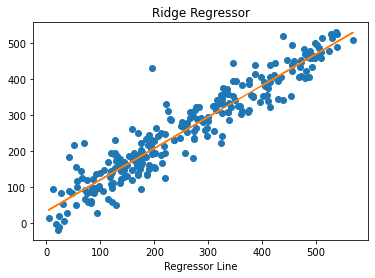

In [72]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=rid.predict(x_test)

print(res)

x=np.array(y_test)
y=np.array(rid.predict(x_test))

plt.plot(x,y,'o')

m,b=np.polyfit(x,y,1)

plt.plot(x,m*x+b)
plt.xlabel('Regressor Line')
plt.title('Ridge Regressor')

# Validating Test DATA

In [73]:
df_new1

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,...,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,OpenPorchSF,MoSold,YrSold
0,0,48,215,0,0,21,2,6,2,9,...,3,2,5,1,1,0,3,27,6,1
1,11,31,34,0,1,21,2,5,2,5,...,1,2,1,1,1,1,2,0,7,3
2,0,31,180,3,4,4,2,5,2,9,...,3,0,4,1,1,1,2,72,5,3
3,6,40,185,3,4,5,5,4,4,6,...,3,1,4,1,1,2,1,0,6,3
4,5,48,220,0,1,20,5,3,2,9,...,4,2,6,1,3,0,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0,56,137,0,4,11,2,3,2,5,...,3,3,4,1,1,1,2,0,6,2
287,0,43,139,3,4,20,2,5,2,9,...,3,2,3,1,1,1,3,55,9,2
288,0,21,115,1,4,4,2,2,2,9,...,3,3,2,0,5,2,2,0,1,2
289,0,31,165,0,1,11,2,3,4,10,...,2,3,2,1,1,0,2,0,2,4


In [74]:
x1=df_new1
y1=df_new['Skewed_SP']

In [75]:
x1

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,...,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,OpenPorchSF,MoSold,YrSold
0,0,48,215,0,0,21,2,6,2,9,...,3,2,5,1,1,0,3,27,6,1
1,11,31,34,0,1,21,2,5,2,5,...,1,2,1,1,1,1,2,0,7,3
2,0,31,180,3,4,4,2,5,2,9,...,3,0,4,1,1,1,2,72,5,3
3,6,40,185,3,4,5,5,4,4,6,...,3,1,4,1,1,2,1,0,6,3
4,5,48,220,0,1,20,5,3,2,9,...,4,2,6,1,3,0,3,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0,56,137,0,4,11,2,3,2,5,...,3,3,4,1,1,1,2,0,6,2
287,0,43,139,3,4,20,2,5,2,9,...,3,2,3,1,1,1,3,55,9,2
288,0,21,115,1,4,4,2,2,2,9,...,3,3,2,0,5,2,2,0,1,2
289,0,31,165,0,1,11,2,3,4,10,...,2,3,2,1,1,0,2,0,2,4


In [76]:
y1

0       129
1       468
2       470
3       326
4       379
       ... 
1163    114
1164     76
1165    200
1166      4
1167    306
Name: Skewed_SP, Length: 1018, dtype: int64

In [77]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method="yeo-johnson")
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
x1=mn.fit_transform(x1)
x1

array([[0.        , 0.78178845, 0.91673049, ..., 0.74331657, 0.59765186,
        0.31648075],
       [0.91076518, 0.52570346, 0.27069837, ..., 0.        , 0.68205936,
        0.79727005],
       [0.        , 0.52570346, 0.81713619, ..., 0.95043493, 0.51061015,
        0.79727005],
       ...,
       [0.        , 0.36865604, 0.61030234, ..., 0.        , 0.11974699,
        0.57311724],
       [0.        , 0.52570346, 0.77227716, ..., 0.        , 0.22672879,
        1.        ],
       [0.57293521, 0.28747759, 0.21300851, ..., 0.438482  , 0.84446154,
        0.        ]])

In [78]:
print(x1.shape)

(259, 38)


# CONCLUSION

In [79]:
res=pd.DataFrame()
res['Predict']=rid.predict(x1)
print(res)

        Predict
0    587.642002
1    320.620224
2    446.754156
3    263.140857
4    404.493146
..          ...
254  287.254938
255  433.114909
256  144.063368
257  248.606012
258  301.905382

[259 rows x 1 columns]
